# Segundo avance PIA

Informacion requisito para el primer avance del proyecto integrador.

Equipo número 5

Grupo: 03, Lunes
- 1595894 GONZALEZ CAMPOS EDSON ALI
- 1941521 LOPEZ DOMINGUEZ FRANCISCO EVERARDO
- 1663288 HERRERA RIVERA JENNIFER JACQUELINE
- 1981779 SEGOVIA GONZÁLEZ ANAKAREN

1) Titulo de la base de datos BankChurners 

a) bankChuners

b) https://www.kaggle.com/salamatoto/bankchuners

2) Descripción de los datos

a) Son datos bancarios acerca de las tarjetas de crédito de diversos clientes. Los datos están en formato de tablas para su visualización, la mayoria de estos son variables numericas. 

b) Descripción de las columnas: En las columnas de nuestra base de datos se describen desde una columna de identificación que sería clientnum, columnas con texto largo donde entraréan las columnas de attrition_flag, education_level, marital_status y card_category. También hay de tiempo siendo la columna customer_age que nos refleja la edad del cliente o las columnas months_on_book, Total_Relationship_Count y Months_Inactive_12_mon. También hay columnas de datos para medir columnas con datos de medición como en income_category.

3) Justificación del uso de datos

a) Las características que más nos llamaron la atención creo que fue el que sea una base de datos bancaria, es algo cercano a lo que tendremos que trabajar al graduarnos y es interesante el poder manejar algo similar ahora que somos estudiantes. El que podamos manejar los datos sobre sus límites de crédito, tipos de tarjetas e ingresos de los clientes.

b) El poder acostumbrar a nuestra mente a manejar datos bancarios de una manera correcta, poder manipularlos y hacer de ellos algo más simple de manejar.

4) 
* Objetivo final
  + a)	Pronosticar que clientes podrían tener problemas al pagar su cuenta de crédito para seguirlos de cerca.
* Objetivos secundarios
  + a)	Identificar a que edad una persona tiene más ingresos 
  + b)  Evaluar que sexo gasta más dinero según su saldo disponible

## Parte de programación

### Limpieza de datos

Primero importamos las librerias para el proceso de limpieza

In [2]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt


Mandamos llamar nuestra base de datos y la visualizamos sin modificaciones

In [3]:
df = pd.read_csv("BankChurners.csv",header = 0,sep = ",")

df 

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


Eliminamos las columnas inecesarias en nuestra base de datos, son columnas que no se necesitaran pues son muy complicadas de definir

In [4]:
df = df.drop(['Attrition_Flag','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'],axis=1)

Para facilitar la manipulación cambiamos los nombres de las columnas

In [5]:
df = df.rename(columns = {'CLIENTNUM':'NumeroDCliente'}) 
df = df.rename(columns = {'Customer_Age':'EdadDCliente'})
df = df.rename(columns = {'Gender':'Genero'})
df = df.rename(columns = {'Dependent_count':'CuentasDependientes'})
df = df.rename(columns = {'Education_Level':'NivelDEducacion'})
df = df.rename(columns = {'Marital_Status':'EstadoCivil'})
df = df.rename(columns = {'Income_Category':'IntervaloDIngresos'})
df = df.rename(columns = {'Card_Category':'NivelDTarjeta'})
df = df.rename(columns = {'Months_on_book':'MesesEnLibro'})
df = df.rename(columns = {'Total_Relationship_Count':'CuentasRelacionadas'})
df = df.rename(columns = {'Months_Inactive_12_mon':'MesesInactivoEnUnAnho'})
df = df.rename(columns = {'Contacts_Count_12_mon':'ContactoConLaCuenta'})
df = df.rename(columns = {'Credit_Limit':'LimiteCrediticio'})
df = df.rename(columns = {'Total_Revolving_Bal':'TotalDSaldoRotatorio'})
df = df.rename(columns = {'Avg_Open_To_Buy':'SaldoDisponible'})
df = df.rename(columns = {'Avg_Utilization_Ratio':'PorcentajeUtilizado'})
df = df.rename(columns = {'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2':'ClasificacionNaiveBayes'})
print(df)


       NumeroDCliente  EdadDCliente Genero  CuentasDependientes  \
0           768805383            45      M                    3   
1           818770008            49      F                    5   
2           713982108            51      M                    3   
3           769911858            40      F                    4   
4           709106358            40      M                    3   
...               ...           ...    ...                  ...   
10122       772366833            50      M                    2   
10123       710638233            41      M                    2   
10124       716506083            44      F                    1   
10125       717406983            30      M                    2   
10126       714337233            43      F                    2   

      NivelDEducacion EstadoCivil IntervaloDIngresos NivelDTarjeta  \
0         High School     Married        $60K - $80K          Blue   
1            Graduate      Single     Less than $40K   

Para saber si tenemos datos nulos en nuestra base de datos

In [6]:
df.isnull().any()

NumeroDCliente             False
EdadDCliente               False
Genero                     False
CuentasDependientes        False
NivelDEducacion            False
EstadoCivil                False
IntervaloDIngresos         False
NivelDTarjeta              False
MesesEnLibro               False
CuentasRelacionadas        False
MesesInactivoEnUnAnho      False
ContactoConLaCuenta        False
LimiteCrediticio           False
TotalDSaldoRotatorio       False
SaldoDisponible            False
PorcentajeUtilizado        False
ClasificacionNaiveBayes    False
dtype: bool

Como no tenemos datos nulos que manejar en nuestra base de datos la guardaremos

Para guardar la base de datos ya modificada (https://aprendeia.com/importar-y-exportar-datos-en-python/)

In [7]:
ruta = "/Users/jenny/Documents/BankChurnersMod.csv"
df.to_csv(ruta)

### Estadística básica de los datos

Primero utilizamos la función describe para saber mas de nuestra columna SaldoDisponible, la cual sera muy importante para nuestro objetivo principal pues esta nos dice si un cliente se quedara sin credito en su cuenta.
Tomaremos como posible cliente con problemas para pagar a cualquier cliente con un saldo disponible menor a 2000.

In [25]:
df["LimiteCrediticio"].describe()

count    10127.000000
mean      8631.953698
std       9088.776650
min       1438.300000
25%       2555.000000
50%       4549.000000
75%      11067.500000
max      34516.000000
Name: LimiteCrediticio, dtype: float64

Como podemos ver tenemos clientes ya casi al limite de su credito con el minimo de 1438, tambien notamos que segun la restricción que pusimos, menos del 25% de nuestros clienes podrian tener problemas para pagar su cuenta.

In [26]:
prom = df['EdadDCliente'].mean()
EdadMin = df['EdadDCliente'].min()
EdadMax = df['EdadDCliente'].max() 
Mediana = df['EdadDCliente'].median()


print("El promedio de edad de clientes que usan el banco es:", prom)
print("La edad minima de clientes que usan el banco es:", EdadMin)
print("La edad maxima de clientes que usan el banco es:", EdadMax)
print("La mediana de edad de los clientes que usan el banco es:", Mediana)

El promedio de edad de clientes que usan el banco es: 46.32596030413745
La edad minima de clientes que usan el banco es: 26
La edad maxima de clientes que usan el banco es: 73
La mediana de edad de los clientes que usan el banco es: 46.0


Revisamos el promedio, la edad minima y maxima para darnos una idea de cual es el rango de edad que hay entre los clientes del banco

### Gráficas

Para las graficas de los datos usaremos la base de datos previamente limpiada en la actividad pasada para que sea mas simple su uso

In [27]:
df1 = pd.read_csv("BankChurnersMod.csv",header = 0,sep = ",")

df1 

,Unnamed: 0,NumeroDCliente,EdadDCliente,Genero,CuentasDependientes,NivelDEducacion,EstadoCivil,IntervaloDIngresos,NivelDTarjeta,MesesEnLibro,CuentasRelacionadas,MesesInactivoEnUnAnho,ContactoConLaCuenta,LimiteCrediticio,TotalDSaldoRotatorio,SaldoDisponible,PorcentajeUtilizado,ClasificacionNaiveBayes
0,0,768805383,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,0.061,0.999910
1,1,818770008,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,0.105,0.999940
2,2,713982108,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,0.000,0.999980
3,3,769911858,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,0.760,0.999870
4,4,709106358,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,0.000,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,10122,772366833,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.462,0.999810
10123,10123,710638233,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.511,0.004729
10124,10124,716506083,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.000,0.002118
10125,10125,717406983,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.000,0.003294


### Para nuestro objetivo principal

Crearemos una grafica que nos diga que genero utiliza mas nuestro banco, si el femenino o el masculino 

<AxesSubplot:>

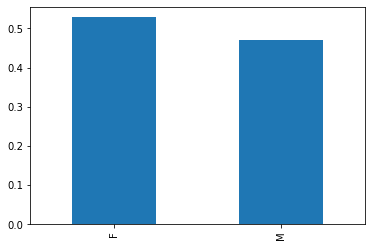

In [28]:
(df1['Genero'].value_counts() / len(df1)).plot.bar()


En la grafica notamos que aunque no por mucho hay una mayoria femenina a masculina

Ahora partiendo del genero y usando la restricción que pusimos anteriormente donde los clientes con menos de 2000 en su saldo disponible podrian tener problemas para pagar su credito creamos un histograma combinando ambas columnas

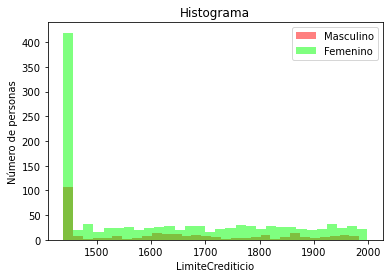

In [29]:
m = plt.hist(df1[df1["Genero"] == "M"].query('LimiteCrediticio<2000').LimiteCrediticio,bins=30,fc = (1,0,0,0.5),label = "Masculino")
f = plt.hist(df1[df1["Genero"] == "F"].query('LimiteCrediticio<2000').LimiteCrediticio,bins=30,fc = (0,1,0,0.5),label = "Femenino")
plt.legend()
plt.xlabel("LimiteCrediticio")
plt.ylabel("Número de personas")
plt.title("Histograma")
plt.show()

Con esta grafica nuestra conclusión es que las mujeres son las que mas problemas podrian tener al pagar su credito, al ser una clara mayoria siendo ademas las que predominan en el rango de menos de 1500 del limite crediticio

### Para nuestros objetivos secundarios

* Objetivo secundario 1: Primero hacemos un histograma para identificar donde esta la media de edad de nuestros clientes 

<AxesSubplot:xlabel='EdadDCliente', ylabel='Count'>

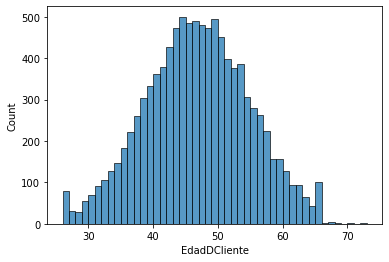

In [37]:
sns.histplot(df1["EdadDCliente"])

Como podemos notar la edad prmedio es de 45 años aproximadamente, ahora haremos un grafico boxplot donde compararemos la edad con los intervalos de ingresos

<AxesSubplot:xlabel='IntervaloDIngresos', ylabel='EdadDCliente'>

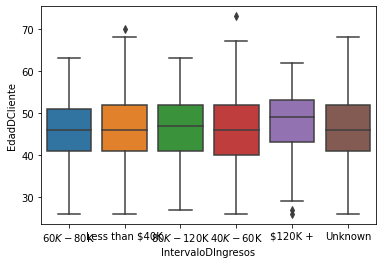

In [36]:
sns.boxplot(
    x='IntervaloDIngresos',
    y='EdadDCliente',
    data=df1
)

Como podemos notar en nuestra grafica en realidad no hay mucha diferencia de un intervalo de ingresos a otro, siendo solamente el de mayor a 120,000 donde la edad media es mas alta llegando a ser casi 50 años.
Con esto nuestra hipotesis de que la edad es factor para un mayor ingreso es erronea.

* Objetivo secundario 2: Como nos dimos cuenta en la grafica del objetivo principal según el limite crediticio las mujeres son las que tienen mayor posibilidad a tener problemas para pagar, como nuestro objetivo secundario es revisar que sexo gasta mas dinero segun su saldo disponible haremos una grafica multi variable para confirmar si esto es cierto o no

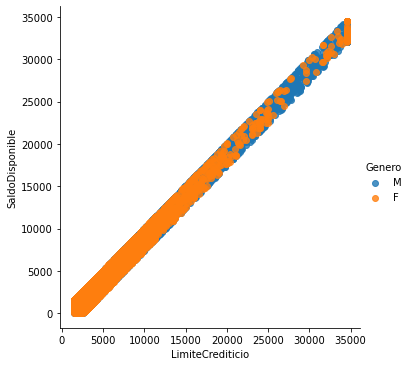

In [40]:
sns.lmplot(x='LimiteCrediticio', y='SaldoDisponible', hue='Genero', 
           data=df1.loc[df1['Genero'].isin(['M', 'F'])], 
           fit_reg=False)

Con esta grafica vemos que efectivamente, en ambas columnas la mujer es la que tiene tanto el menor limite crediticio como el menor saldo disponible 

### Conclusiones generales
Con esto creemos que nuestro objetivo principal quedo parcialmente respondido por que aunque ya nos dimos cuenta que las mujeres son las que podrian tener mas problemas para pagar tambien deberiamos de revisar otras variables como la edad o la escolaridad para identificar mejor.
De nuestros objetivos secundarios creemos que ya se resolvieron casi en su totalidad aunque podriamos agregar otros mas conforme avancemos el proyecto.
Nuestras estrategias cambiaron puesto que tuvimos que pensar muy bien como abordar nuestra base de datos para poder resolver nuestra problematica principal y de pensar eso salio el problema de revisar otras variables ademas del sexo para averiguar el que clientes no podrian pagar.